In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt

In [23]:
data = pd.read_csv("athlete_events.csv",parse_dates=["Year"])
data.sort_values(["Year"],ascending=True, inplace=True)

In [24]:
data["Year"] = data["Year"].dt.year

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 214333 to 236646
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 33.1+ MB


In [27]:
data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [34]:
data["Medal"].isin(["Silver"])

214333    False
244717     True
244716    False
23912     False
23913     False
          ...  
142355    False
47729     False
47728     False
47746     False
236646    False
Name: Medal, Length: 271116, dtype: bool

In [46]:
medals_data = data["Medal"].value_counts()
medals_data_num = medals_data.tolist()
medals_data_num

[13372, 13295, 13116]

In [45]:
medals = data["Medal"].unique()
medals_names  = medals.tolist()
medals_names.pop(0)
medals_names

['Silver', 'Gold', 'Bronze']

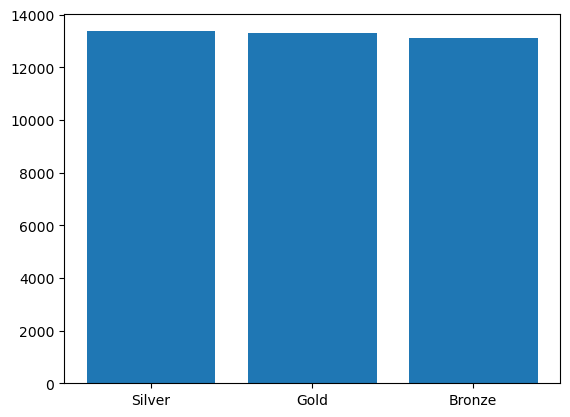

In [48]:
plt.bar(medals_names, medals_data_num)
plt.show()

In [49]:
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
214333,107607,Fritz Richard Gustav Schuft,M,19.0,NaN,NaN,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Pommelled Horse,NaN
244717,122526,Pierre Alexandre Tuffri,M,19.0,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Triple Jump,Silver
244716,122526,Pierre Alexandre Tuffri,M,19.0,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Long Jump,NaN
23912,12563,Conrad Helmut Fritz Bcker,M,25.0,NaN,NaN,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horse Vault,NaN
23913,12563,Conrad Helmut Fritz Bcker,M,25.0,NaN,NaN,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Parallel Bars,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142355,71419,Luis Fernando Lpez Erazo,M,37.0,166.0,60.0,Colombia,COL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 20 kilometres Walk,NaN
47729,24610,Enrico D'Aniello,M,20.0,152.0,53.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxed Eights,NaN
47728,24609,Sabrina D'Angelo,F,23.0,173.0,71.0,Canada,CAN,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Women's Football,Bronze
47746,24621,Andrea Mitchell D'Arrigo,M,21.0,194.0,85.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 200 metres Freestyle,NaN


In [102]:
from matplotlib.pyplot import bar


teams_medal_count = data.groupby("Team")["Medal"].count().sort_values(ascending=False)
teams_greater_than =  teams_medal_count >= 1
teams_greater_than =teams_medal_count[teams_medal_count >= 30]
teams_greater_than.info

<bound method Series.info of Team
United States          5219
Soviet Union           2451
Germany                1984
Great Britain          1673
France                 1550
                       ... 
Georgia                  32
Austria-1                32
Trinidad and Tobago      32
Thailand                 30
South Korea-1            30
Name: Medal, Length: 81, dtype: int64>